# This notebook include 3 main section:
- Use **K-Nearest-neighbor**
- Use **Logistic-Regression**
- Use **Naive Bayes** :
    * with **Gaussian**
    * with **Bernoulli**

### Importing needed library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import random
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, jaccard_score, classification_report, log_loss
import itertools

### Load Data From CSV File

In [2]:
data = pd.read_csv('Bank-Personal-Loan-Modelling(1).csv')

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df = pd.DataFrame(data)

df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Show Dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Check NaN exist in columns

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

explore data by using visualization techniques:

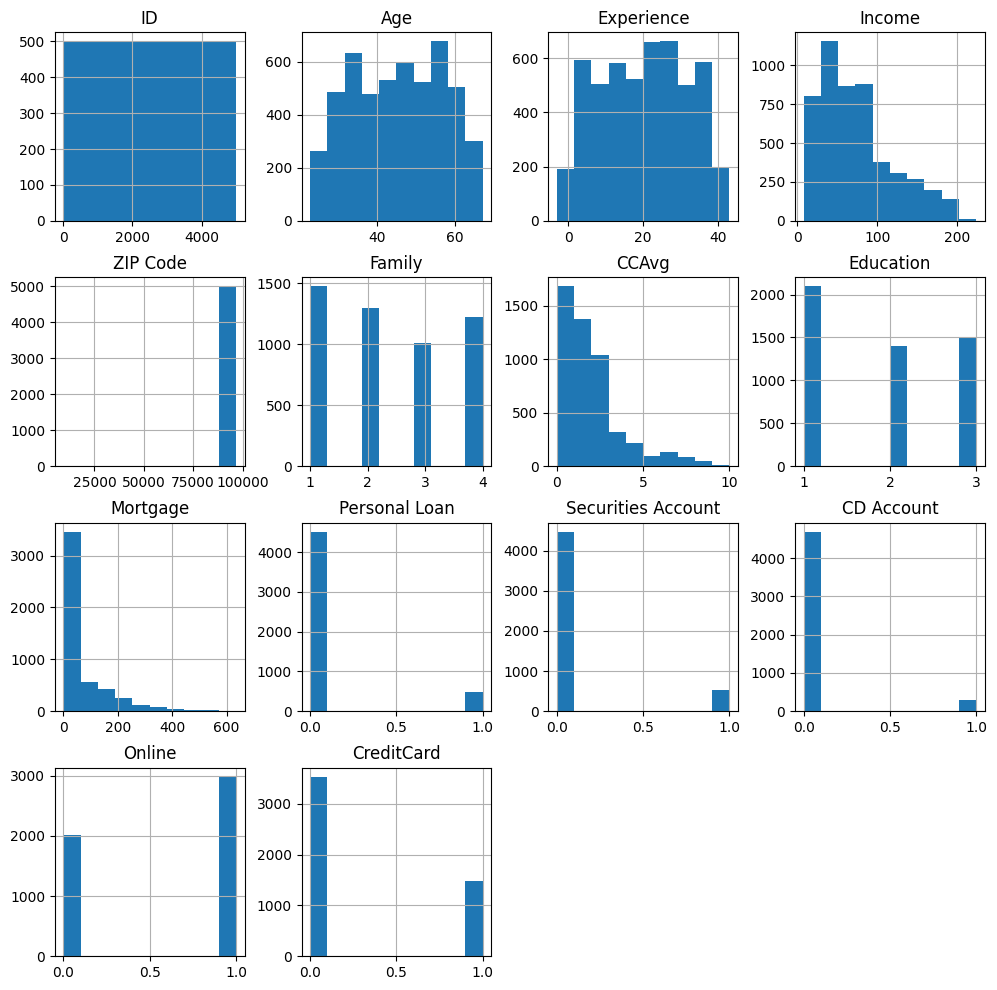

In [7]:
hist = df.hist(figsize=(12, 12))

ID columns has unique values so it don't have effect to our model 

In [8]:
df.drop(['ID'], axis=1, inplace=True)

In [9]:
df.Experience.sort_values()

4514    -3
2618    -3
4285    -3
3626    -3
3796    -2
        ..
1480    42
465     42
2846    43
3886    43
4360    43
Name: Experience, Length: 5000, dtype: int64

From visualize data, understand that experience columns have unormal values (negative range). So we start to fix it.

In [10]:
df.Experience.value_counts().sort_values()

Experience
 43      3
-3       4
 42      8
-2      15
-1      33
 41     43
 40     57
 0      66
 1      74
 39     85
 2      85
 38     88
 12    102
 31    104
 4     113
 21    113
 36    114
 37    116
 11    116
 33    117
 13    117
 10    118
 8     119
 15    119
 6     119
 7     121
 29    124
 22    124
 27    125
 34    125
 17    125
 30    126
 14    127
 16    127
 3     129
 24    131
 26    134
 19    135
 18    137
 28    138
 25    142
 35    143
 23    144
 5     146
 9     147
 20    148
 32    154
Name: count, dtype: int64

Here we fix the noises

In [11]:
df['Experience'] = df['Experience'].abs()

In [12]:
df.Experience.sort_values()

2756     0
2009     0
4393     0
347      0
4425     0
        ..
1480    42
465     42
2846    43
3886    43
4360    43
Name: Experience, Length: 5000, dtype: int64

In [13]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Check to know columns how much have relations with each other.

In [14]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


Visualize dataframe correlation 

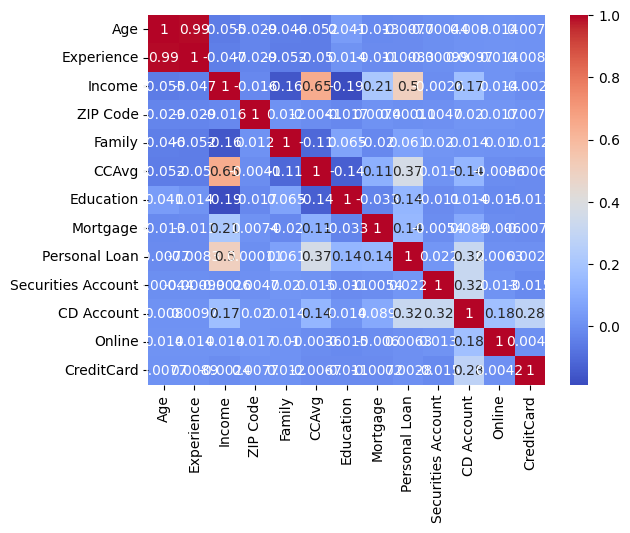

In [15]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

Continue to exploring data by using visualization techniques:

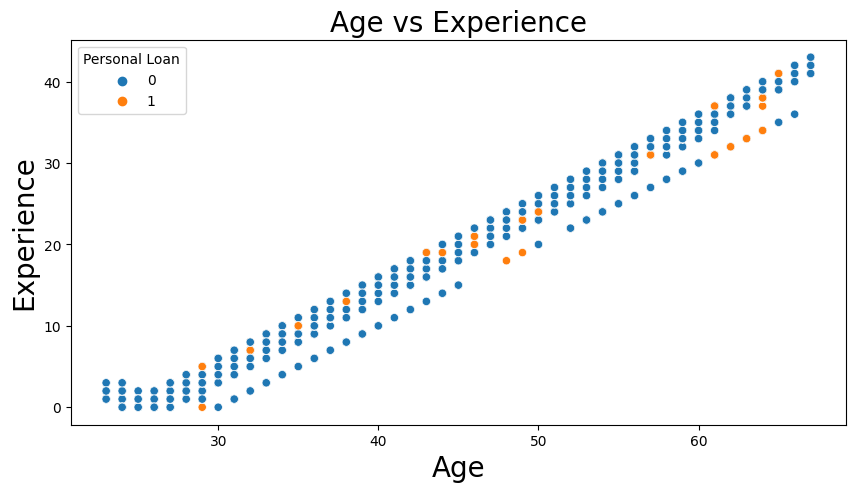

In [16]:
plt.figure(figsize=(10,5))

sns.scatterplot(x="Age", y="Experience", hue="Personal Loan", legend=True, data=df)

plt.title("Age vs Experience",fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Experience",fontsize=20)

plt.show()

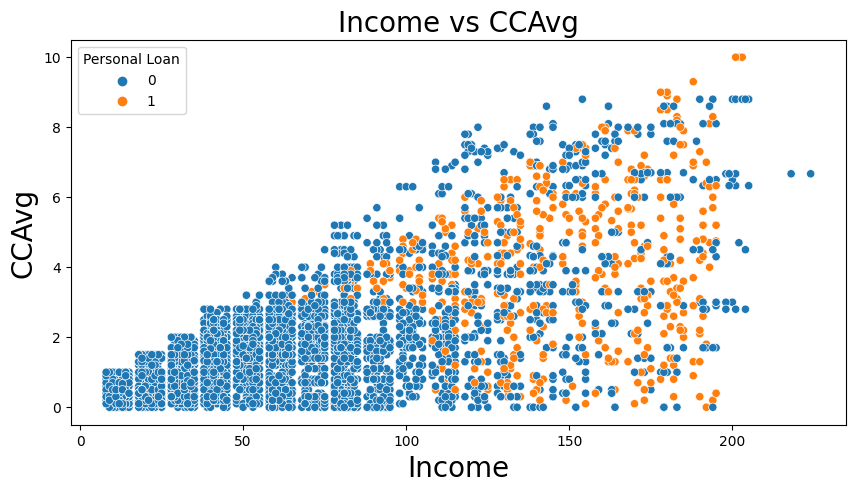

In [17]:
plt.figure(figsize=(10,5))

sns.scatterplot(x="Income", y="CCAvg", hue="Personal Loan", legend=True, data=df)

plt.title("Income vs CCAvg",fontsize=20)
plt.xlabel("Income",fontsize=20)
plt.ylabel("CCAvg",fontsize=20)

plt.show()

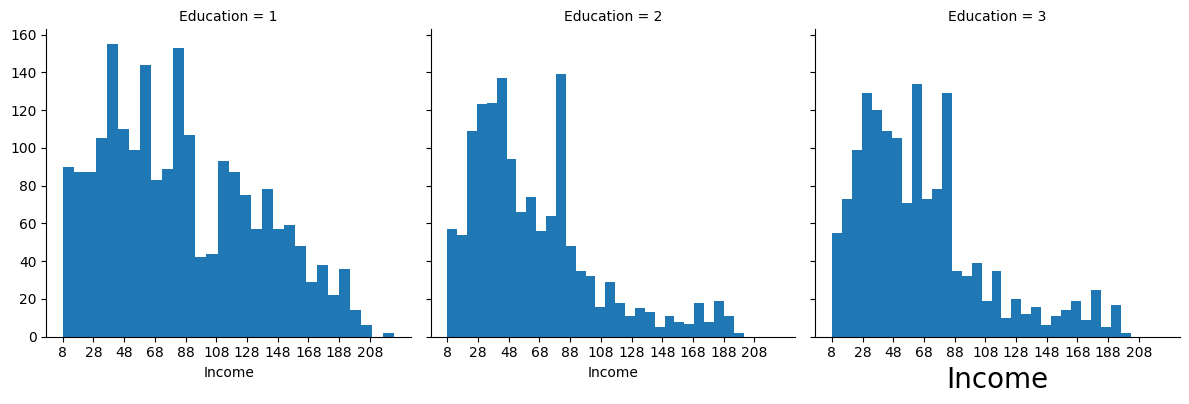

In [18]:
# Create FacetGrid
g = sns.FacetGrid(df, col='Education', height=4)
g = g.map(plt.hist, 'Income', bins=30)

# Set labels
plt.xlabel("Income", fontsize=20)
plt.ylabel("CCAvg", fontsize=20)

# Compute x-axis tick positions and labels
x_ticks = np.arange(df.Income.min(), df.Income.max() + 1, 20)
x_tick_labels = [str(int(i)) for i in x_ticks]

# Set x-axis tick positions and labels for each Axes
for ax in g.axes.flat:
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels)

plt.show()

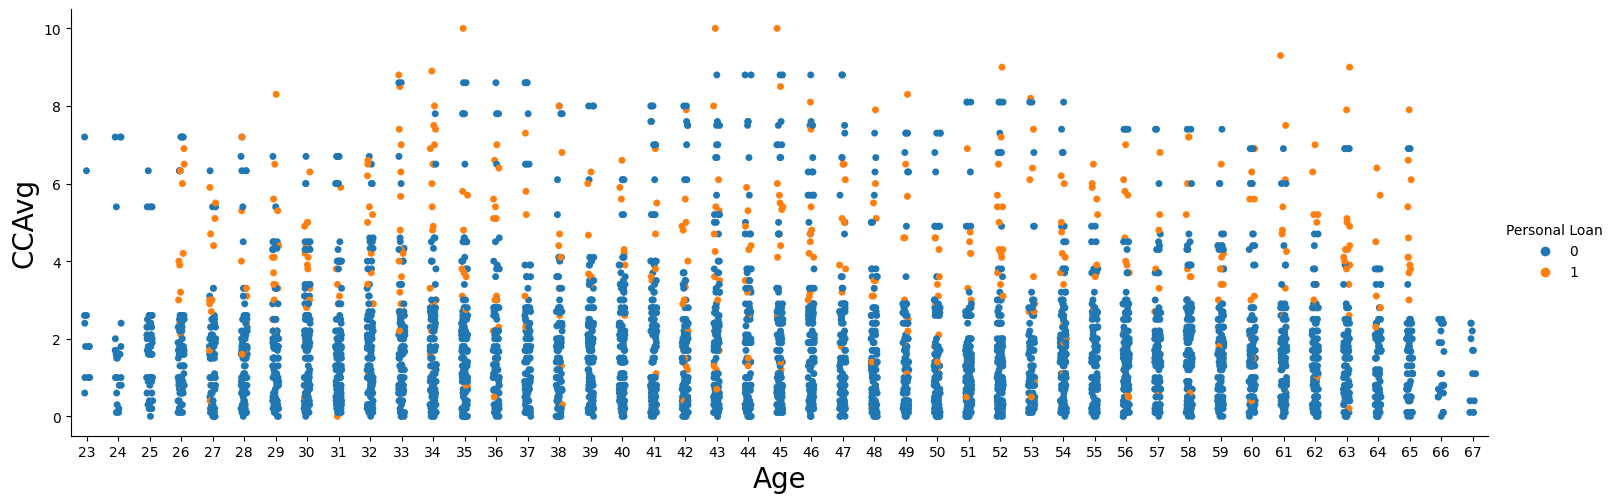

In [19]:
sns.catplot(y="CCAvg", x="Age", hue="Personal Loan", data=df, aspect = 3)
plt.xlabel("Age",fontsize=20)
plt.ylabel("CCAvg",fontsize=20)
plt.show()

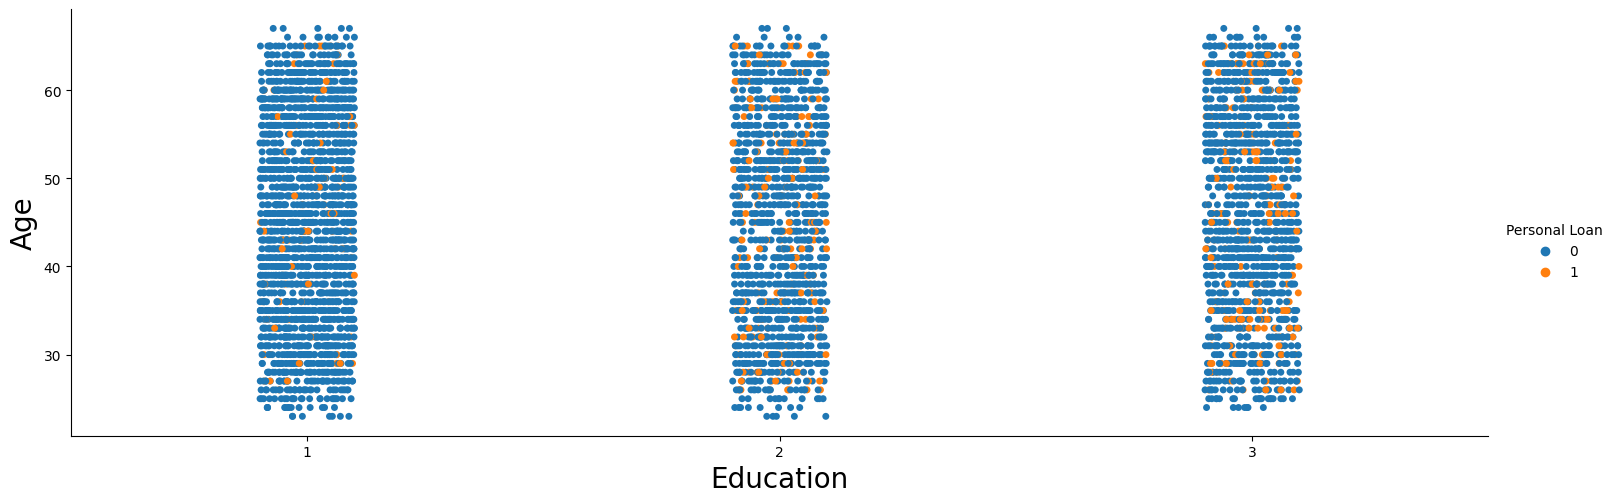

In [20]:
sns.catplot(y="Age", x="Education", hue="Personal Loan", data=df, aspect = 3)

plt.xlabel("Education",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.show()

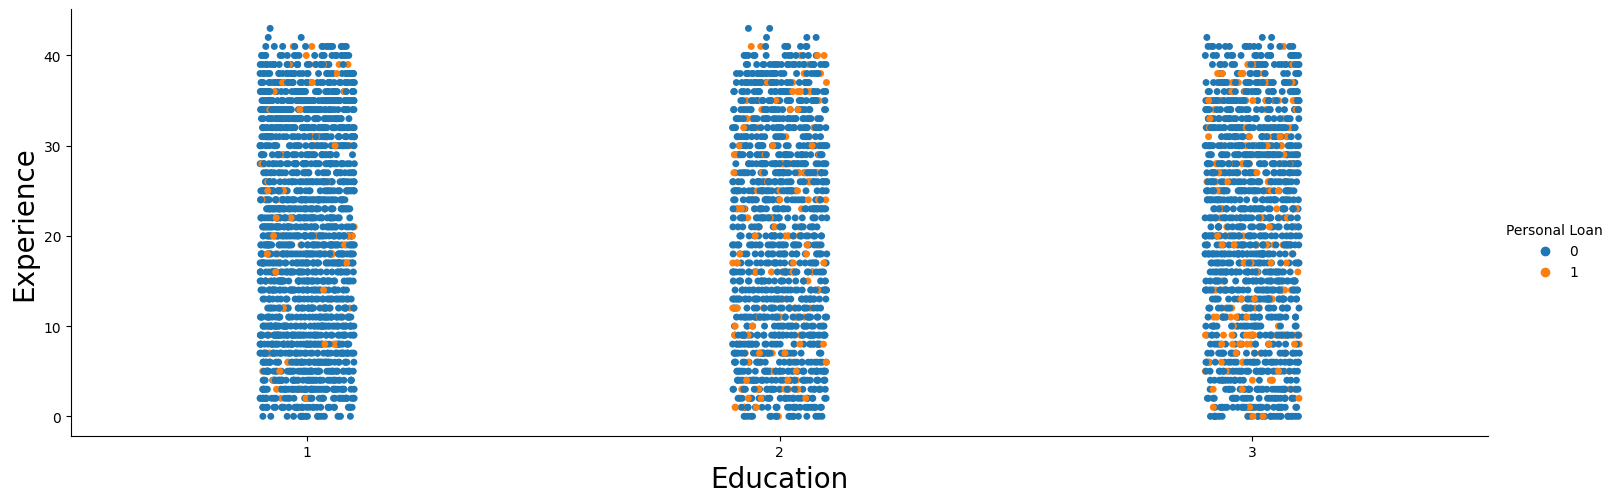

In [21]:
sns.catplot(y="Experience", x="Education", hue="Personal Loan", data=df, aspect = 3)

plt.xlabel("Education",fontsize=20)
plt.ylabel("Experience",fontsize=20)
plt.show()

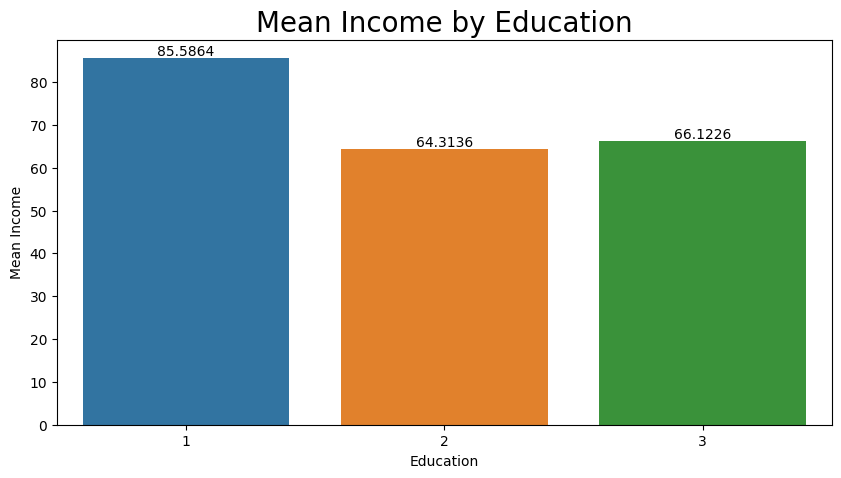

In [22]:
plt.figure(figsize=(10, 5))

mean_income_by_education = df.groupby('Education')['Income'].mean()

ax = sns.barplot(x=mean_income_by_education.index, y=mean_income_by_education.values)

plt.ylabel('Mean Income')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.title('Mean Income by Education', fontsize=20)

plt.show()

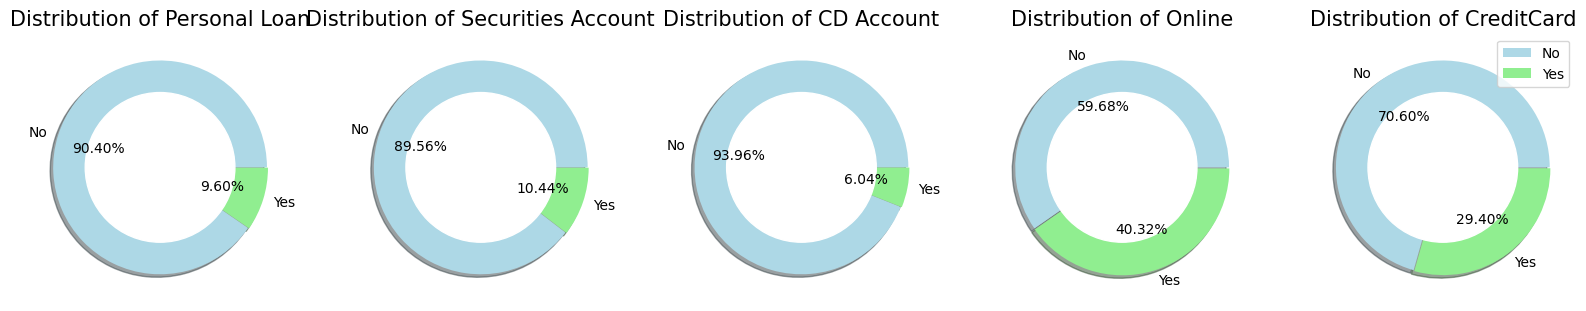

In [23]:
fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

for i,column in enumerate(columns):
    plt.subplot(1,5,i+1)
    size = df[column].value_counts()
    colors = ['lightblue', 'lightgreen']
    labels = "No", "Yes"
    explode = [0, 0.01]

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

val10: 1289, val20: 1253, val30: 1301, val40: 1103, val50: 54


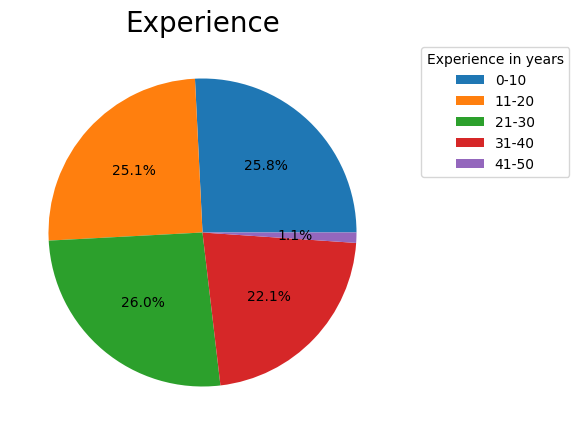

In [24]:
def sep_val(data):
    val10 = [i for i in data if i in range(0,11)]
    val20 = [i for i in data if i in range(11,21)]
    val30 = [i for i in data if i in range(21,31)]
    val40 = [i for i in data if i in range(31,41)]
    val50 = [i for i in data if i in range(41,51)]
    print(f"val10: {len(val10)}, val20: {len(val20)}, val30: {len(val30)}, val40: {len(val40)}, val50: {len(val50)}")
    
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
    sizes = [len(val10), len(val20), len(val30), len(val40), len(val50)]

    pct_lst= [i/len(df) for i in sizes]
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.pie(sizes, autopct= '%1.1f%%')
    
    plt.title('Experience', fontsize=20)
    
    plt.legend(labels, bbox_to_anchor=(1.05, 1), title="Experience in years", loc="best")
    
    return plt.show()

sep_val(df.Experience)

val1: 525, val2: 274, val3: 77, val4: 52, val5: 17


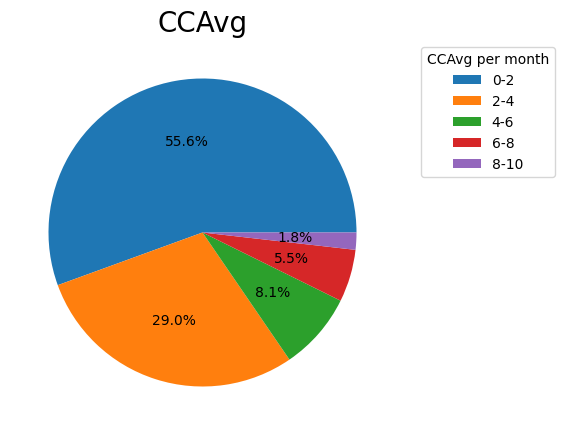

In [25]:
def sep_val_2(data):
    val1 = [i for i in data if i in range(0,3)]
    val2 = [i for i in data if i in range(2,5)]
    val3 = [i for i in data if i in range(4,7)]
    val4 = [i for i in data if i in range(6,9)]
    val5 = [i for i in data if i in range(8,11)]
    print(f"val1: {len(val1)}, val2: {len(val2)}, val3: {len(val3)}, val4: {len(val4)}, val5: {len(val5)}")
    
    labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
    sizes = [len(val1), len(val2), len(val3), len(val4), len(val5)]

    pct_lst= [i/len(df) for i in sizes]
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.pie(sizes, autopct= '%1.1f%%')
    
    plt.title('CCAvg', fontsize=20)
    
    plt.legend(labels, bbox_to_anchor=(1.05, 1), title="CCAvg per month", loc="best")
    
    return plt.show()

sep_val_2(df.CCAvg)

val1: 2444, val2: 1634, val3: 673, val4: 249


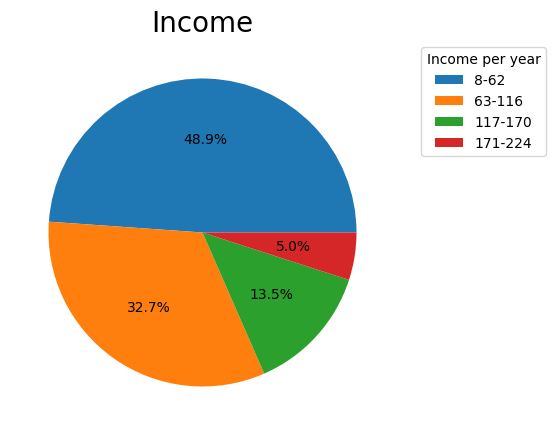

In [26]:
def sep_val_3(data):
    val1 = [i for i in data if i in range(8,63)]
    val2 = [i for i in data if i in range(63,117)]
    val3 = [i for i in data if i in range(117,171)]
    val4 = [i for i in data if i in range(171,225)]
    print(f"val1: {len(val1)}, val2: {len(val2)}, val3: {len(val3)}, val4: {len(val4)}")
    
    labels = ['8-62', '63-116', '117-170', '171-224']
    sizes = [len(val1), len(val2), len(val3), len(val4)]

    pct_lst= [i/len(df) for i in sizes]
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.pie(sizes, autopct= '%1.1f%%')
    
    plt.title('Income', fontsize=20)
    
    plt.legend(labels, bbox_to_anchor=(1.05, 1), title="Income per year", loc="best")
    
    return plt.show()

sep_val_3(df.Income)

Counter({1: 1472, 2: 1296, 4: 1222, 3: 1010})


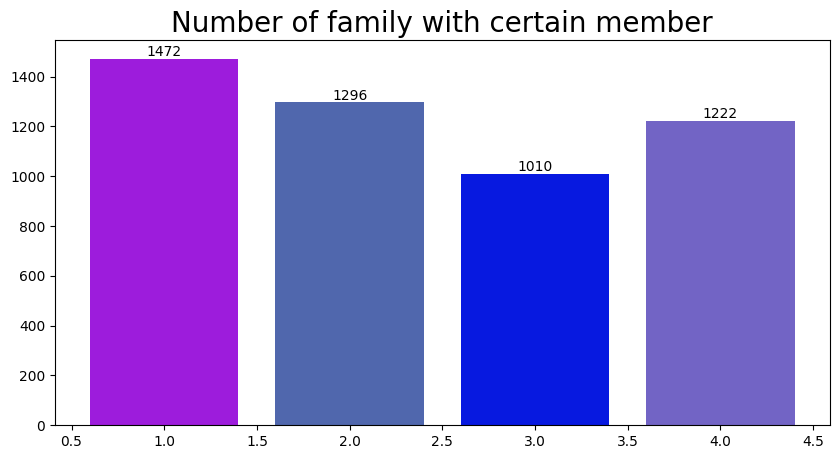

In [27]:
lst = df.Family.tolist()

c = Counter(lst)
print(c)

categories = [i for i in c.keys()]
values = [j for j in c.values()]

# create random colors
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

colors = [random_color() for i in range(len(categories))]

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values, color=colors)

plt.title('Number of family with certain member', fontsize=20)

# Add values as text annotations
for k, v in c.items():
    plt.annotate(str(v), xy=(k, v), ha='center', va='bottom')

# Display the chart
plt.show()

Counter({1: 2096, 3: 1501, 2: 1403})


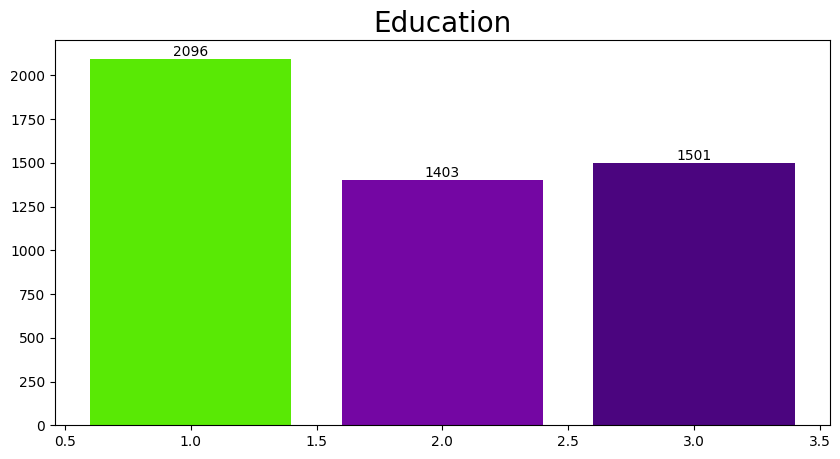

In [28]:
lst = df.Education.tolist()

c = Counter(lst)
print(c)

categories = [i for i in c.keys()]
values = [j for j in c.values()]

# create random colors
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

colors = [random_color() for i in range(len(categories))]

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values, color=colors)

plt.title('Education', fontsize=20)

# Add values as text annotations
for k, v in c.items():
    plt.annotate(str(v), xy=(k, v), ha='center', va='bottom')

# Display the chart
plt.show()

Counter({0: 4478, 1: 522})


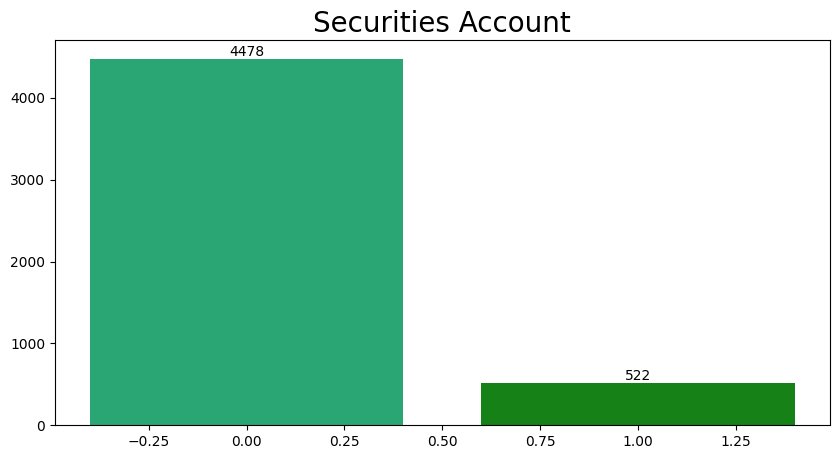

In [29]:
lst = df['Securities Account'].tolist()

c = Counter(lst)
print(c)

categories = [i for i in c.keys()]
values = [j for j in c.values()]

# create random colors
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

colors = [random_color() for i in range(len(categories))]

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values, color=colors)

plt.title('Securities Account', fontsize=20)

# Add values as text annotations
for k, v in c.items():
    plt.annotate(str(v), xy=(k, v), ha='center', va='bottom')

# Display the chart
plt.show()

Counter({0: 4698, 1: 302})


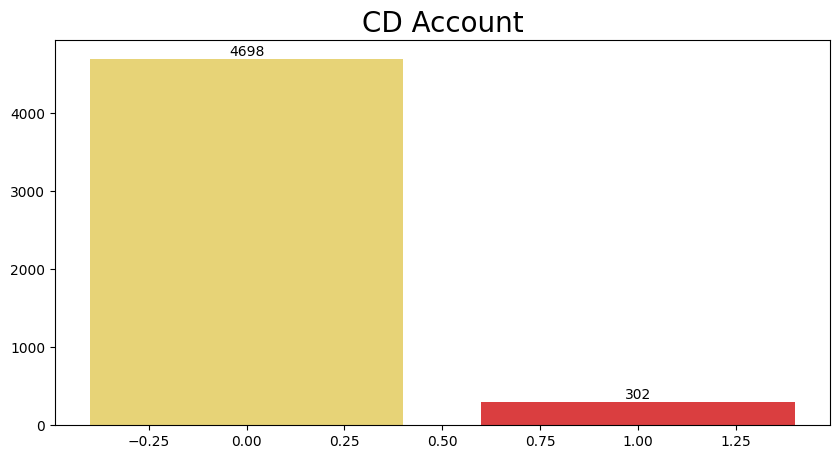

In [30]:
lst = df['CD Account'].tolist()

c = Counter(lst)
print(c)

categories = [i for i in c.keys()]
values = [j for j in c.values()]

# create random colors
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

colors = [random_color() for i in range(len(categories))]

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values, color=colors)

plt.title('CD Account', fontsize=20)

# Add values as text annotations
for k, v in c.items():
    plt.annotate(str(v), xy=(k, v), ha='center', va='bottom')

# Display the chart
plt.show()

Counter({1: 2984, 0: 2016})


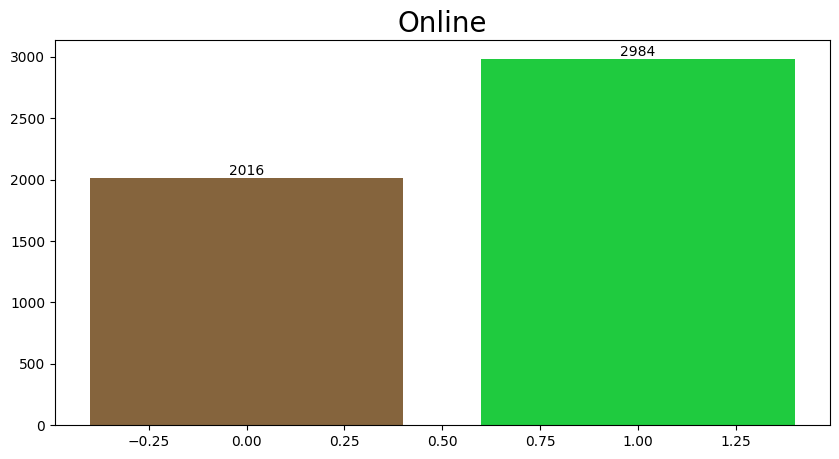

In [31]:
lst = df['Online'].tolist()

c = Counter(lst)
print(c)

categories = [i for i in c.keys()]
values = [j for j in c.values()]

# create random colors
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

colors = [random_color() for i in range(len(categories))]

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values, color=colors)

plt.title('Online', fontsize=20)

# Add values as text annotations
for k, v in c.items():
    plt.annotate(str(v), xy=(k, v), ha='center', va='bottom')

# Display the chart
plt.show()

Counter({0: 3530, 1: 1470})


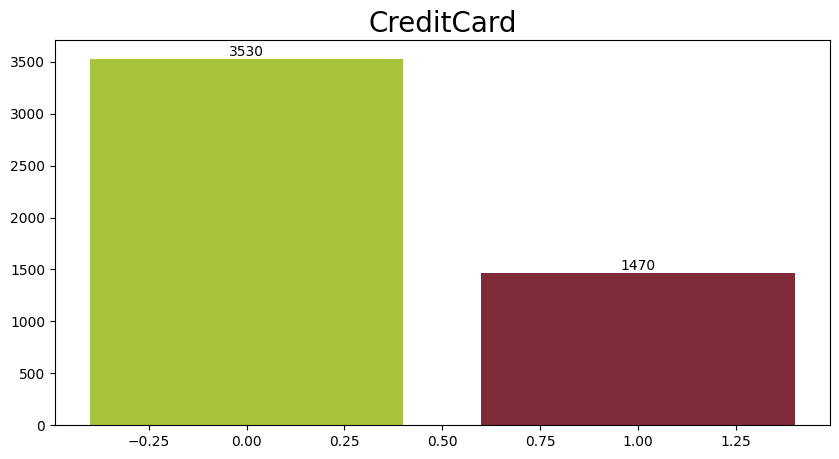

In [32]:
lst = df['CreditCard'].tolist()

c = Counter(lst)
print(c)

categories = [i for i in c.keys()]
values = [j for j in c.values()]

# create random colors
def random_color():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)

colors = [random_color() for i in range(len(categories))]

# Create a bar chart
plt.figure(figsize=(10,5))
plt.bar(categories, values, color=colors)

plt.title('CreditCard', fontsize=20)

# Add values as text annotations
for k, v in c.items():
    plt.annotate(str(v), xy=(k, v), ha='center', va='bottom')

# Display the chart
plt.show()

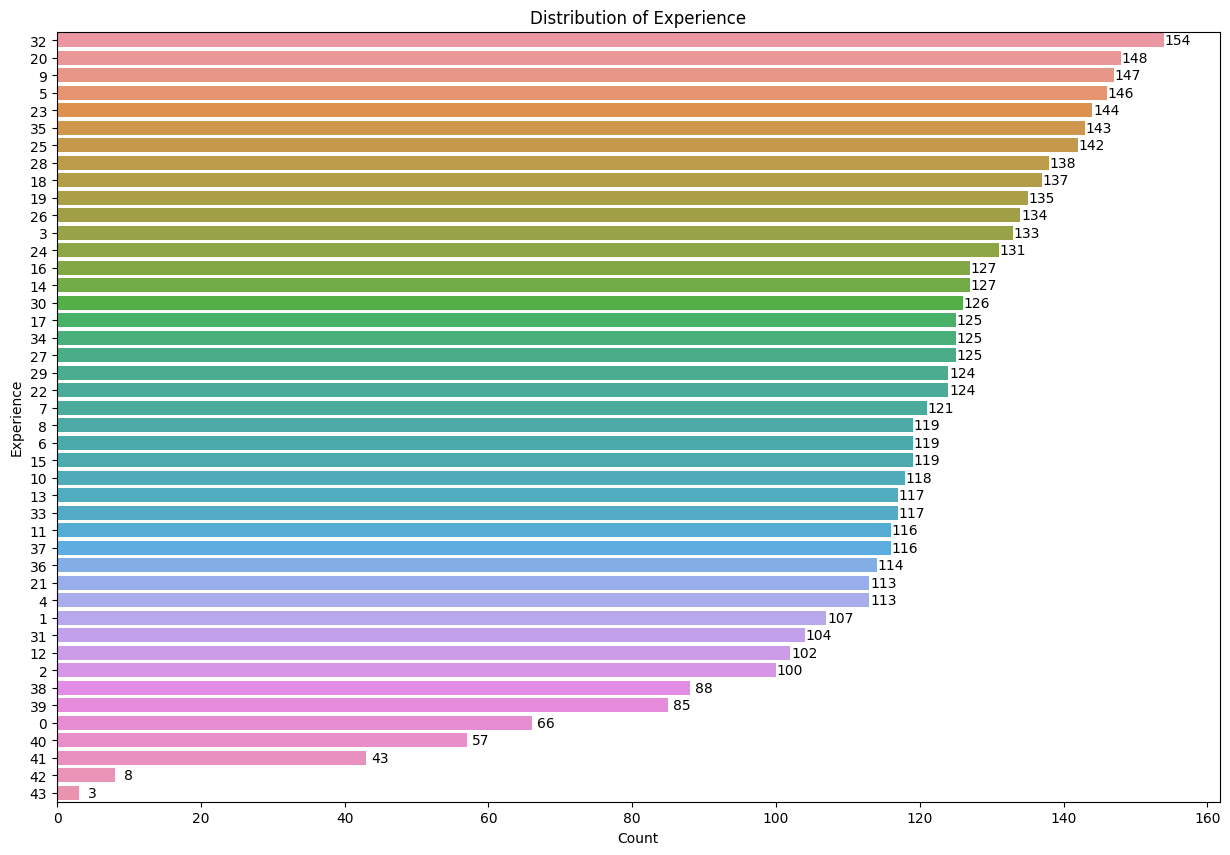

In [33]:
# Assuming you have a DataFrame called 'df' with a column 'Experience'
plt.figure(figsize=(15, 10))

# Plot the countplot with annotations
ax = sns.countplot(y=df.Experience, data=df, order=df.Experience.value_counts().index[:])
plt.title('Distribution of Experience')
plt.xlabel('Count')
plt.ylabel('Experience')

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')

plt.show()

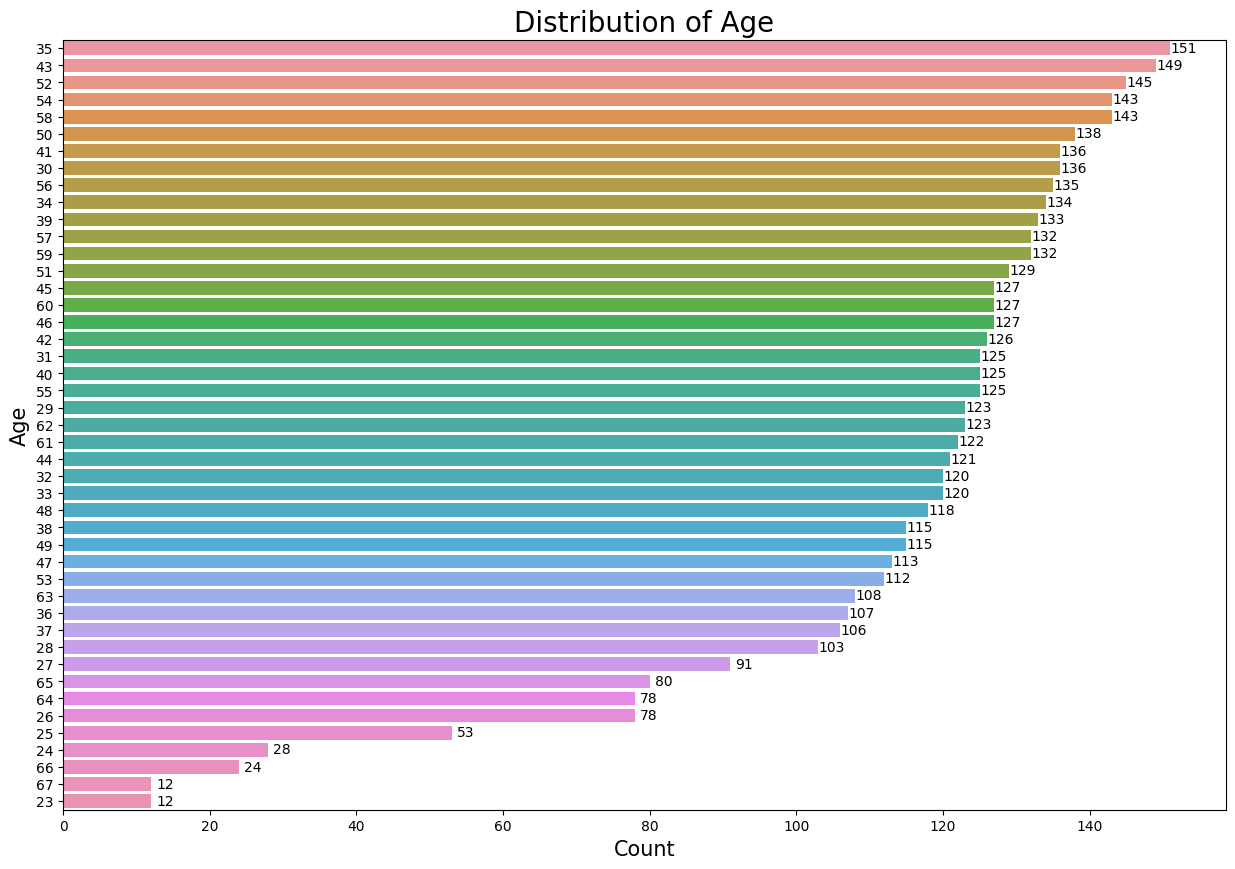

In [34]:
# Assuming you have a DataFrame called 'df' with a column 'Age'
plt.figure(figsize=(15, 10))

# Plot the countplot with annotations
ax = sns.countplot(y=df.Age, data=df, order=df.Age.value_counts().index[:])
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Age', fontsize=15)

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')

plt.show()

Find location of zipcodes with **geocode()**

In [35]:
# Using Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Zipcode input
zipcode = set(df['ZIP Code'].values.ravel())
zip_lst = list(zipcode)

# Using geocode()
location = [geolocator.geocode(i) for i in zip_lst]

# Create DataFrame
loca = pd.DataFrame({'Zipcode': zip_lst, 'Location': location})

# Display address details
loca.head()

,Zipcode,Location
0,92161,"(San Diego, San Diego County, California, 9216..."
1,92173,"(San Ysidro, San Diego, San Diego County, Cali..."
2,92177,"(Selja küla, Hiiumaa vald, Käina osavald, 9217..."
3,92182,"(San Diego, San Diego County, California, 9218..."
4,94234,"(Bayern, 94234, Deutschland, (49.09077375, 12...."


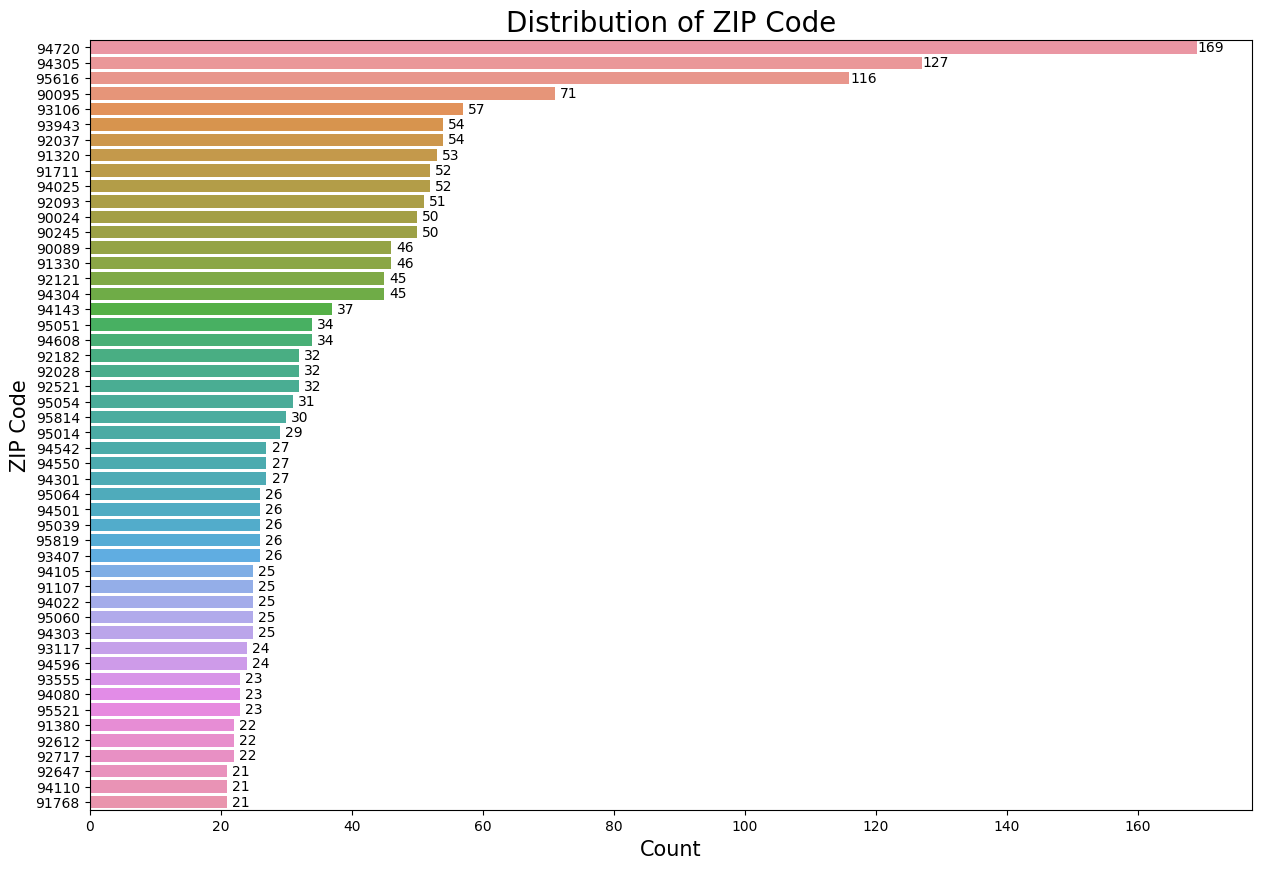

In [36]:
# Assuming you have a DataFrame called 'df' with a column 'ZIP Code'
plt.figure(figsize=(15, 10))

# Plot the countplot with annotations
ax = sns.countplot(y=df['ZIP Code'], data=df, order=df['ZIP Code'].value_counts().index[:50])
plt.title('Distribution of ZIP Code', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('ZIP Code', fontsize=15)

# Add annotations to the countplot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')

plt.show()

<hr>

<a id="ref3"></a>

## 1- Use K-Nearest-neighbors

Define feature sets, X:

In [37]:
X = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Securities Account','CD Account', 'Online',
        'CreditCard']].values
X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

Define feature sets, y:

In [38]:
y = df[['Personal Loan']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Normalize data

In [39]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[:5]

array([[-1.77441684, -1.67640794, -0.53822878, -0.96411408,  1.39741398,
        -0.19338544, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09940383, -0.8641094 , -1.44393158,  0.52599094,
        -0.25061056, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44984918, -1.36379301,  0.73881384, -1.21685513,
        -0.53673618, -1.04907792, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -0.97551722,  0.56976533,  0.45224308, -1.21685513,
         0.43609092,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -1.06312856, -0.62513027, -0.85900671,  1.39741398,
        -0.53673618,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774,  1.54963239]])

Train Test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print (f'Train set: {X_train.shape} {y_train.shape}')
print (f'Test set: {X_test.shape} {y_test.shape}')

Train set: (4000, 12) (4000, 1)
Test set: (1000, 12) (1000, 1)


Calculate the accuracy of KNN for different values of k

In [41]:
K = 21
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train.ravel())
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])
    
print(mean_acc)

[0.96  0.95  0.969 0.955 0.96  0.954 0.96  0.955 0.961 0.953 0.955 0.951
 0.956 0.953 0.956 0.95  0.953 0.95  0.95  0.948]


Plot the model accuracy for a different number of neighbors.

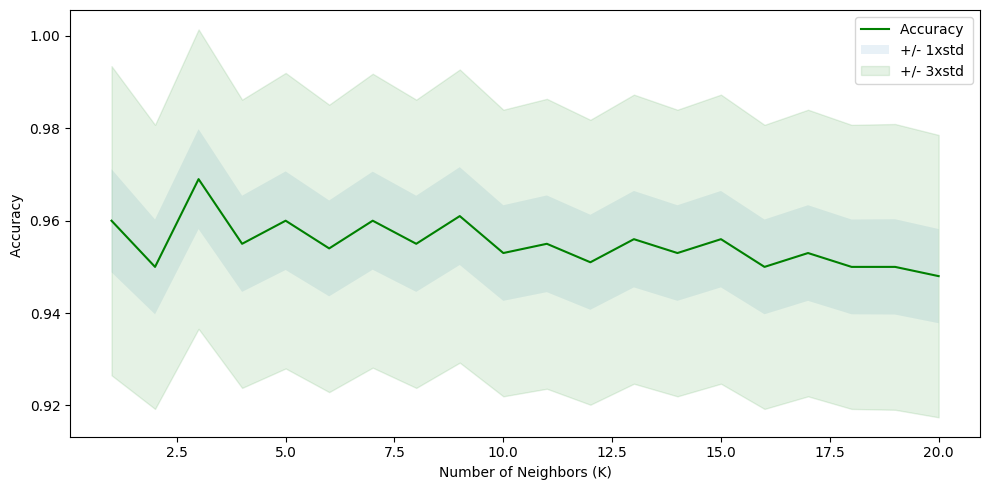

In [42]:
plt.figure(figsize=(10,5))
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) # type: ignore
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green") # type: ignore
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Show the best accuracy with its k

In [43]:
print(f"The best accuracy was with {mean_acc.max()} with k= {mean_acc.argmax()+1}") 

The best accuracy was with 0.969 with k= 3


Hypertuning model parameters using GridSearchCV

In [44]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

we can check which of our values for ‘n_neighbors’ that we tested performed the best

In [45]:
print(knn_gscv.best_params_)

{'n_neighbors': 3}


In [46]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])

knn.fit(X_train, y_train.ravel())


KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred = knn.predict(X_test)

y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
y_pred_prob = knn.predict_proba(X_test)

y_pred_prob[:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Evalute our model

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       912
           1       1.00      0.65      0.79        88

    accuracy                           0.97      1000
   macro avg       0.98      0.82      0.88      1000
weighted avg       0.97      0.97      0.97      1000



Visualize confusion matrix

Normalized confusion matrix


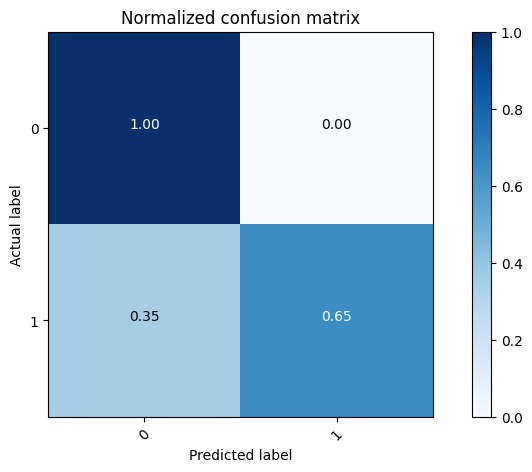

In [50]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Example usage
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names = df['Personal Loan'].unique()

plt.figure(figsize=(10,5))
plot_confusion_matrix(confusion_matrix, classes=class_names, normalize= True, title='Normalized confusion matrix')

plt.show()

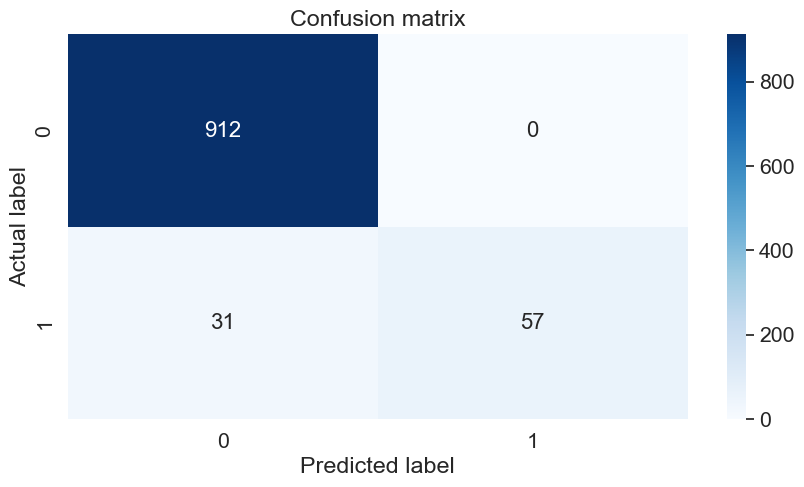

In [51]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4) # for label size

sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues') # font size

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.title('Confusion matrix')

plt.show()

k-Fold Cross-Validation

In [52]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y.ravel(), cv=10)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.958 0.97  0.962 0.96  0.958 0.974 0.952 0.938 0.95  0.96 ]
cv_scores mean:0.9582


Compare actual and predict data in data frame mode 

In [53]:
Compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})

Compare

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,1,0
997,0,0
998,0,0


Test model with certain example

In [54]:
neigh = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors']).fit(X_train,y_train.ravel())

print(neigh.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])) # type: ignore

[0]


<hr>

<a id="ref3"></a>

## 2- Use Logistic-Regression

### Load Data From CSV File

In [55]:
data = pd.read_csv('Bank-Personal-Loan-Modelling(1).csv')

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [56]:
df = pd.DataFrame(data)

df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [57]:
df.drop(['ID'], axis=1, inplace=True)

Here we fix the noises

In [58]:
df['Experience'] = df['Experience'].abs()

Define feature sets, X:

In [59]:
X = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Securities Account','CD Account', 'Online',
        'CreditCard']].values

X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

Define feature sets, y:

In [60]:
y = df[['Personal Loan']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Normalize data

In [61]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[:5]

array([[-1.77441684, -1.67640794, -0.53822878, -0.96411408,  1.39741398,
        -0.19338544, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09940383, -0.8641094 , -1.44393158,  0.52599094,
        -0.25061056, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44984918, -1.36379301,  0.73881384, -1.21685513,
        -0.53673618, -1.04907792, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -0.97551722,  0.56976533,  0.45224308, -1.21685513,
         0.43609092,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -1.06312856, -0.62513027, -0.85900671,  1.39741398,
        -0.53673618,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774,  1.54963239]])

Train Test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print (f'Train set: {X_train.shape} {y_train.shape}')
print (f'Test set: {X_test.shape} {y_test.shape}')

Train set: (4000, 12) (4000, 1)
Test set: (1000, 12) (1000, 1)


Use **GridSearchCV()** for calculate **LogisticRegression()** parameters 

In [63]:
import warnings
warnings.filterwarnings('ignore')

# parameter grid
parameters = {
    'penalty' : ['none', 'elasticnet', 'l1', 'l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

In [64]:
LR = LogisticRegression()
clf = GridSearchCV(LR,                    # model
                    scoring='accuracy',        # metric for scoring
                    param_grid = parameters,   # hyperparameters
                    cv=5)                     # number of folds

In [65]:
clf.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [66]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.95075


build model using **LogisticRegression**

In [67]:
LR = LogisticRegression(C=clf.best_params_['C'], penalty=clf.best_params_['penalty'], solver=clf.best_params_['solver']).fit(X_train,y_train.ravel())
LR

LogisticRegression(C=0.1, solver='newton-cg')

predict using test set:

In [68]:
y_pred = LR.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
y_pred_prob = LR.predict_proba(X_test)[::,1]
y_pred_prob[:10]

array([0.23354175, 0.00104734, 0.02195812, 0.04602068, 0.0145742 ,
       0.01363838, 0.00162358, 0.26766175, 0.00811184, 0.07137731])

Try the jaccard and other index for accuracy evaluation

In [70]:
print(jaccard_score(y_test, y_pred, pos_label = 1))
print(jaccard_score(y_test, y_pred, pos_label = 0))

0.5161290322580645
0.9527310924369747


Visualize confusion matrix

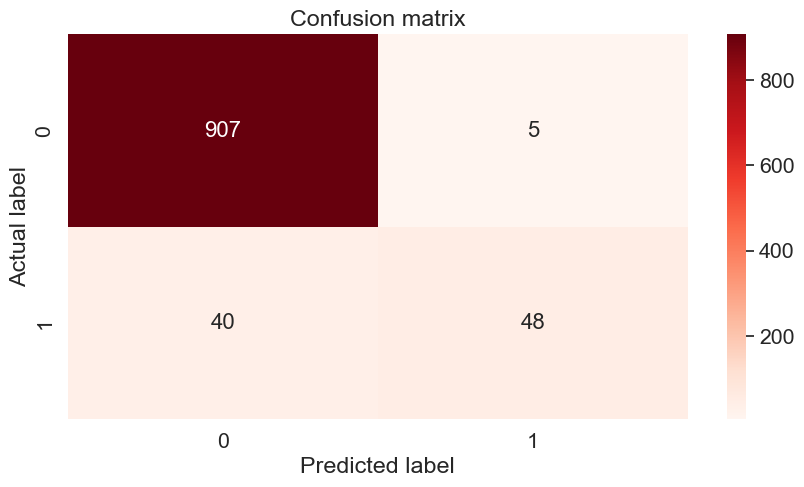

In [71]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4) # for label size

sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Reds') # font size

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.title('Confusion matrix')

plt.show()

In [72]:
print(classification_report(y_test, y_pred))
print(f' log_loss: {log_loss(y_test, y_pred_prob)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       912
           1       0.91      0.55      0.68        88

    accuracy                           0.95      1000
   macro avg       0.93      0.77      0.83      1000
weighted avg       0.95      0.95      0.95      1000

 log_loss: 0.12271298195501876


In [73]:
print(f'Model intercept: \n{LR.intercept_}')

print(f'Model coefficients: \n{LR.coef_}')

Model intercept: 
[-4.18178771]
Model coefficients: 
[[ 0.05617715  0.06447719  2.12122079 -0.01740237  0.69763861  0.21564078
   1.17540796  0.03938873 -0.19886854  0.69762799 -0.24990331 -0.38556248]]


ROC Curve

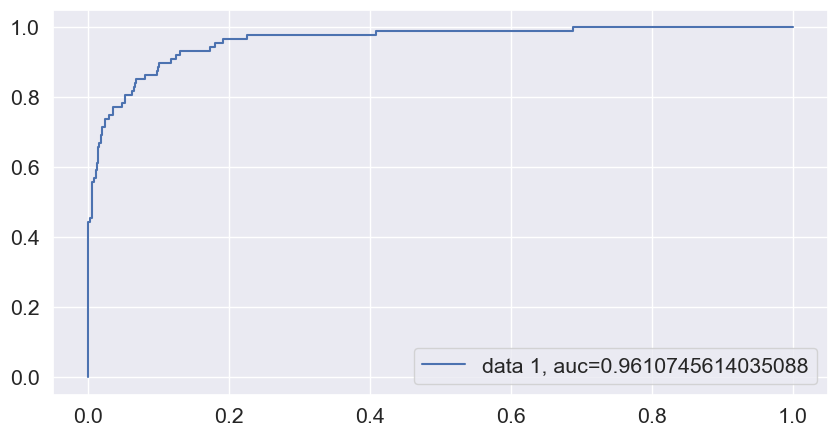

In [74]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Compare actual and predict data in data frame mode 

In [75]:
Compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})

Compare

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,1,1
997,0,0
998,0,0


Test model with certain example

In [76]:
LR = LogisticRegression(C=clf.best_params_['C'],penalty=clf.best_params_['penalty'], solver=clf.best_params_['solver']).fit(X_train,y_train.ravel())

print(LR.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]]))

[0]


<hr>

<a id="ref3"></a>

## 2- Use Naive Bayes

### Load Data From CSV File

In [77]:
data = pd.read_csv('Bank-Personal-Loan-Modelling(1).csv')

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [78]:
df = pd.DataFrame(data)

df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [79]:
df.drop(['ID'], axis=1, inplace=True)

Here we fix the noises

In [80]:
df['Experience'] = df['Experience'].abs()

Define feature sets, X:

In [81]:
X = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Securities Account','CD Account', 'Online',
        'CreditCard']].values

X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

Define feature sets, y:

In [82]:
y = df[['Personal Loan']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Normalize data

In [83]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[:5]

array([[-1.77441684, -1.67640794, -0.53822878, -0.96411408,  1.39741398,
        -0.19338544, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09940383, -0.8641094 , -1.44393158,  0.52599094,
        -0.25061056, -1.04907792, -0.55552393,  2.92891517, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44984918, -1.36379301,  0.73881384, -1.21685513,
        -0.53673618, -1.04907792, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -0.97551722,  0.56976533,  0.45224308, -1.21685513,
         0.43609092,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774, -0.64531434],
       [-0.90197022, -1.06312856, -0.62513027, -0.85900671,  1.39741398,
        -0.53673618,  0.14170292, -0.55552393, -0.34142334, -0.25354028,
        -1.21661774,  1.54963239]])

Train, Test split

In [84]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print (f'Train set: {X_train.shape} {y_train.shape}')
print (f'Test set: {X_test.shape} {y_test.shape}')

Train set: (4000, 12) (4000, 1)
Test set: (1000, 12) (1000, 1)


Input data contains negative values because of normalizing data, which is not compatible with the MultinomialNB algorithm.

In [85]:
gnb = GaussianNB()
# mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')
# mnb_scores = cross_val_score(mnb, X_train, y_train, cv=5, scoring='accuracy')
bnb_scores = cross_val_score(bnb, X_train, y_train, cv=5, scoring='accuracy')

Compare the mean accuracy scores and standard deviations to determine which NB model performs the best on your data. Higher accuracy and lower standard deviation indicate better performance.

In [87]:
print("GaussianNB Mean Accuracy:", gnb_scores.mean())
print("GaussianNB Standard Deviation:", gnb_scores.std(), "\n")

# print("MultinomialNB Mean Accuracy:", mnb_scores.mean())
# print("MultinomialNB Standard Deviation:", mnb_scores.std())

print("BernoulliNB Mean Accuracy:", bnb_scores.mean())
print("BernoulliNB Standard Deviation:", bnb_scores.std())

GaussianNB Mean Accuracy: 0.88325
GaussianNB Standard Deviation: 0.009239859306288158 

BernoulliNB Mean Accuracy: 0.9137500000000001
BernoulliNB Standard Deviation: 0.007786205751198716


#### Use **BernoulliNB()**

In [88]:
# Define the hyperparameter you want to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

In [89]:
# Create a GridSearchCV object with the classifier, hyperparameter, and cross-validation strategy
grid_search = GridSearchCV(bnb, param_grid, cv=5)

In [90]:
# Fit the data to find the best hyperparameter
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0], 'binarize': [0.0, 0.5, 1.0],
                         'fit_prior': [True, False]})

In [91]:
# Access the best hyperparameter and the best model
print(grid_search.best_params_)

{'alpha': 0.5, 'binarize': 0.0, 'fit_prior': True}


build model using **Bernoulli Naive Bayes**

In [92]:
bnb = BernoulliNB(alpha=grid_search.best_params_['alpha'], binarize=grid_search.best_params_['binarize'], fit_prior=grid_search.best_params_['fit_prior'], class_prior=None).fit(X_train, y_train.ravel())
bnb

BernoulliNB(alpha=0.5)

predict using test set:

In [93]:
y_pred = bnb.predict(X_test)

y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [94]:
y_pred_prob = bnb.predict_proba(X_test)
y_pred_prob[:10]

array([[8.62212978e-01, 1.37787022e-01],
       [9.99591775e-01, 4.08224704e-04],
       [9.99578099e-01, 4.21900756e-04],
       [9.40632459e-01, 5.93675409e-02],
       [9.99780599e-01, 2.19401358e-04],
       [9.99561675e-01, 4.38325468e-04],
       [9.99501395e-01, 4.98605143e-04],
       [3.43218908e-01, 6.56781092e-01],
       [9.99264822e-01, 7.35177503e-04],
       [5.22682586e-01, 4.77317414e-01]])

Try indexes for accuracy evaluation

Visualize confusion matrix

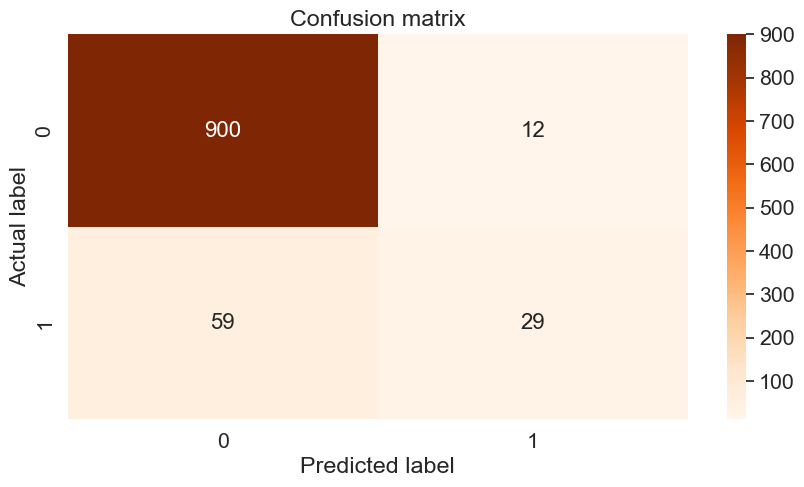

In [95]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4) # for label size

sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Oranges') # font size

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.title('Confusion matrix')

plt.show()

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       912
           1       0.71      0.33      0.45        88

    accuracy                           0.93      1000
   macro avg       0.82      0.66      0.71      1000
weighted avg       0.92      0.93      0.92      1000



Compare actual and predict data in data frame mode 

In [97]:
Compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})

Compare

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,1,0
997,0,0
998,0,0


Test model with certain example

In [98]:
bnb = BernoulliNB(alpha=grid_search.best_params_['alpha'], binarize=grid_search.best_params_['binarize'], fit_prior=grid_search.best_params_['fit_prior'], class_prior=None).fit(X_train, y_train.ravel())

print(bnb.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])) # type: ignore

[1]


#### Use **GaussianNB()**

Use **GridSearchCV()** for calculate **GaussianNB()** parameters 

In [99]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [100]:
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

# fitting the model for grid search
nbModel_grid.fit(X_train, y_train)

print(nbModel_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 1.0}


build model using **Gaussian Naive Bayes**

In [101]:
gnb = GaussianNB(var_smoothing= nbModel_grid.best_params_['var_smoothing']).fit(X_train, y_train.ravel())

gnb

GaussianNB(var_smoothing=1.0)

predict using test set:

In [102]:
y_pred = gnb.predict(X_test)

y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [103]:
y_pred_prob = gnb.predict_proba(X_test)
y_pred_prob[:10]

array([[0.9113365 , 0.0886635 ],
       [0.9977737 , 0.0022263 ],
       [0.98822995, 0.01177005],
       [0.98280348, 0.01719652],
       [0.99067215, 0.00932785],
       [0.99350382, 0.00649618],
       [0.99666652, 0.00333348],
       [0.202027  , 0.797973  ],
       [0.99320042, 0.00679958],
       [0.98145445, 0.01854555]])

Try indexes for accuracy evaluation

Visualize confusion matrix

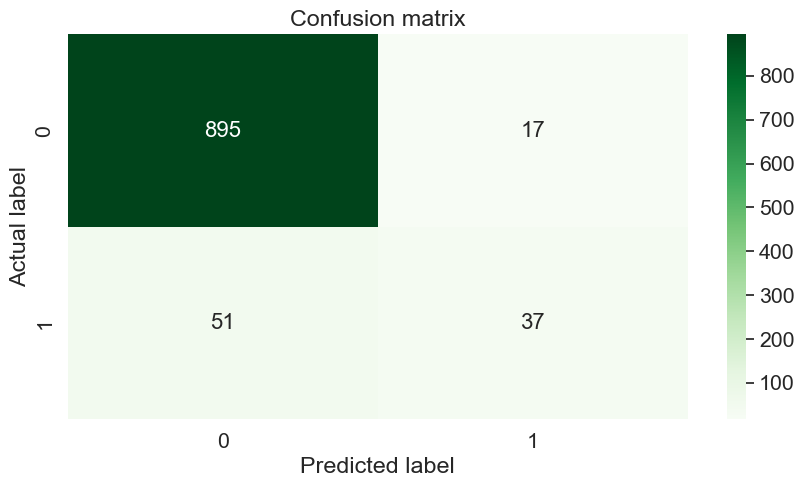

In [104]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4) # for label size

sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Greens') # font size

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.title('Confusion matrix')

plt.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       912
           1       0.69      0.42      0.52        88

    accuracy                           0.93      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.92      0.93      0.92      1000



Compare actual and predict data in data frame mode 

In [106]:
Compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})

Compare

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,1,0
997,0,0
998,0,0


Test model with certain example

In [107]:
gnb = GaussianNB(var_smoothing= nbModel_grid.best_params_['var_smoothing']).fit(X_train, y_train.ravel())

print(gnb.predict([[42, 16, 30, 92037, 3, 1.2, 3, 0, 1, 0, 1, 1]])) # type: ignore

[0]
